In [52]:
from scipy import optimize
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pymoo.core.problem import Problem
#from matplotlib.pyplot import MultipleLocator
from pylab import *

In [3]:
from pymoo.algorithms.moo.nsga2 import NSGA2
from pymoo.factory import get_sampling, get_crossover, get_mutation
from pymoo.optimize import minimize
#from example import MyProblem

algorithm = NSGA2(
    pop_size=40,
    n_offsprings=10,
    sampling=get_sampling("real_random"),
    crossover=get_crossover("real_sbx", prob=0.9, eta=10),
    mutation=get_mutation("real_pm", eta=18),
    eliminate_duplicates=True
)

In [37]:
P_all=[62,72]
M_all=[62,72]
df=pd.DataFrame()
for i in range(0,len(P_all)):
    for j in range(0,len(M_all)):
        temp=[]
        P=P_all[i]
        M=M_all[j]
        a=(P-1.7)/132*24322000
        b=(M-0.6)/121*26134000
        class MyProblem(Problem):
            def __init__(self):
                super().__init__(n_var=14,  
                             n_obj=3,   
                             n_constr=7,    
                             xl=np.array([0,0,0,0,0,0,0,0,0,0,0,0,0,0]),     
                             xu=np.array([a,a,a,a,a,a,a,b,b,b,b,b,b,b]),   
                             )
            def _evaluate(self, x, out, *args, **kwargs):

        
                alpha=0.6
                belta=0.7
                f1 = -x[:, 0]*1250*2/3/6 - x[:, 1]*1250*1/3/6 - x[:, 2]*1629*2/3/3 -  x[:, 3]*1629*1/3/3-x[:, 4]*1303.4*2/3/2-x[:, 5]*1303.4*1/3/2-x[:, 6]*1250*1/3/6-x[:, 7]*1250*1/3/6-x[:, 8]*1629*1/3/3- x[:, 9]*1629*2/3/3-x[:, 10]*1303.4*1/3/2-x[:, 11]*1303.4*2/3/2-x[:, 12]*(0.3*P+12.5)*36-x[:, 13]*(0.3*M+12.8)*36
                f2 = -(x[:, 0]+ x[:, 1]+x[:, 6]+x[:, 7]+x[:, 2]+ x[:, 3]+x[:, 8]+x[:, 9]+x[:, 4]+ x[:, 5]+x[:, 10]+x[:, 11])/1.6*10**5-x[:, 13]/4109
                f3= -x[:, 12]*(0.3*P+12.5)*1.2*10**7-x[:, 13]*(0.3*M+12.8)*1.2*10**7+1.2*10**13
                f4= -2*(x[:, 2]+ x[:, 3]+x[:, 8]+x[:, 9])-6*(x[:, 4]+ x[:, 5]+x[:, 10]+x[:, 11])
        
       
                g1=-(x[:, 0]+ x[:, 1]+x[:, 6]+x[:, 7])+(4.97*10**7/365*80)
                g8=-(x[:, 2]+ x[:, 3]+x[:, 8]+x[:, 9])+(2.65*10**6/365*80)
                g9=-(x[:, 4]+ x[:, 5]+x[:, 10]+x[:, 11])+(9.61*10**6/365*80)              
                g2 = -x[:, 12]*1.2*10**7*(0.3*P+12.5)-x[:, 13]*1.2*10**7*(0.3*M+12.8)+1.2*10**13*80
                g3 = x[:, 0]+x[:, 1]+x[:, 2]+x[:, 3]+x[:, 4]+x[:, 5]+x[:, 12]-(P-1.7)*1.8*10**5+0.24*10**7
                g4 = -x[:, 0]-x[:, 1]-x[:, 2]-x[:, 3]-x[:, 4]-x[:, 5]-x[:, 12]+(P-1.7)*1.8*10**5-2.4*10**7
                g5 = x[:, 6]+x[:, 7]+x[:, 8]+x[:, 9]+x[:, 10]+x[:, 11]+x[:, 13]+alpha*x[:, 12]-(M-0.6)*2.2*10**5+0.26*10**7
                g6 = -x[:, 6]-x[:, 7]-x[:, 8]-x[:, 9]-x[:, 10]-x[:, 11]-x[:, 13]-alpha*x[:, 12]+(M-0.6)*2.2*10**5-2.6*10**7
                g7 = -0.6*x[:, 13]+4.1*10**3*80
        # todo
                out["F"] = np.column_stack([ f2,f3,f4])
                out["G"] = np.column_stack([g1, g2, g3, g4, g5, g6,g7,g8,g9])
        
        res = minimize(MyProblem(),
                   algorithm,
                   seed=1,
                   termination=('n_gen', 1000))
        answer=res.X[:1].squeeze().tolist()
    
        temp.append(answer[0]+answer[1]+answer[2]+answer[3]+answer[4]+answer[5])
        temp.append(answer[6]+answer[7]+answer[8]+answer[9]+answer[10]+answer[11])
        temp.append(answer[12])
        temp.append(answer[13])
        print(P,M,temp)

62 62 [6195240.616924394, 7957532.496829724, 2035749.7059421202, 1667567.343484578]
62 72 [5710007.065272938, 9174773.158146823, 2624272.319225523, 2340518.5692596585]
72 62 [7270379.286753753, 7538432.018129563, 2907931.741813408, 1597042.8877318397]
72 72 [6917468.973479664, 8846291.329038832, 3236908.6427748413, 2240457.5563499066]


In [38]:
df['62 62']=[6195240.616924394, 7957532.496829724, 2035749.7059421202, 1667567.343484578]
df['62 72']=[5710007.065272938, 9174773.158146823, 2624272.319225523, 2340518.5692596585]
df['72 62']=[7270379.286753753, 7538432.018129563, 2907931.741813408, 1597042.8877318397]
df['72 72']=[6917468.973479664, 8846291.329038832, 3236908.6427748413, 2240457.5563499066]
df.index=['Water_Lake Powell','Water_Lake Mead','Electricity_Lake Powell','Electricity_Lake Mead']
df

,62 62,62 72,72 62,72 72
Water_Lake Powell,6.195241e+06,5.710007e+06,7.270379e+06,6.917469e+06
Water_Lake Mead,7.957532e+06,9.174773e+06,7.538432e+06,8.846291e+06
Electricity_Lake Powell,2.035750e+06,2.624272e+06,2.907932e+06,3.236909e+06
Electricity_Lake Mead,1.667567e+06,2.340519e+06,1.597043e+06,2.240458e+06


C:\Users\hwq\AppData\Local\Temp/ipykernel_12072/2530102566.py:14: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  plt.xlim(0, 1.2e+07)
C:\Users\hwq\AppData\Local\Temp/ipykernel_12072/2530102566.py:33: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  plt.xlim(0, 1.2e+07)
C:\Users\hwq\AppData\Local\Temp/ipykernel_12072/2530102566.py:52: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  plt.xlim(0, 1.2e+07)
C:\Users\hwq\AppData\Local\Temp/ipykernel_12072/2530102566.py:71: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  plt.xlim(0, 1.2e+07)


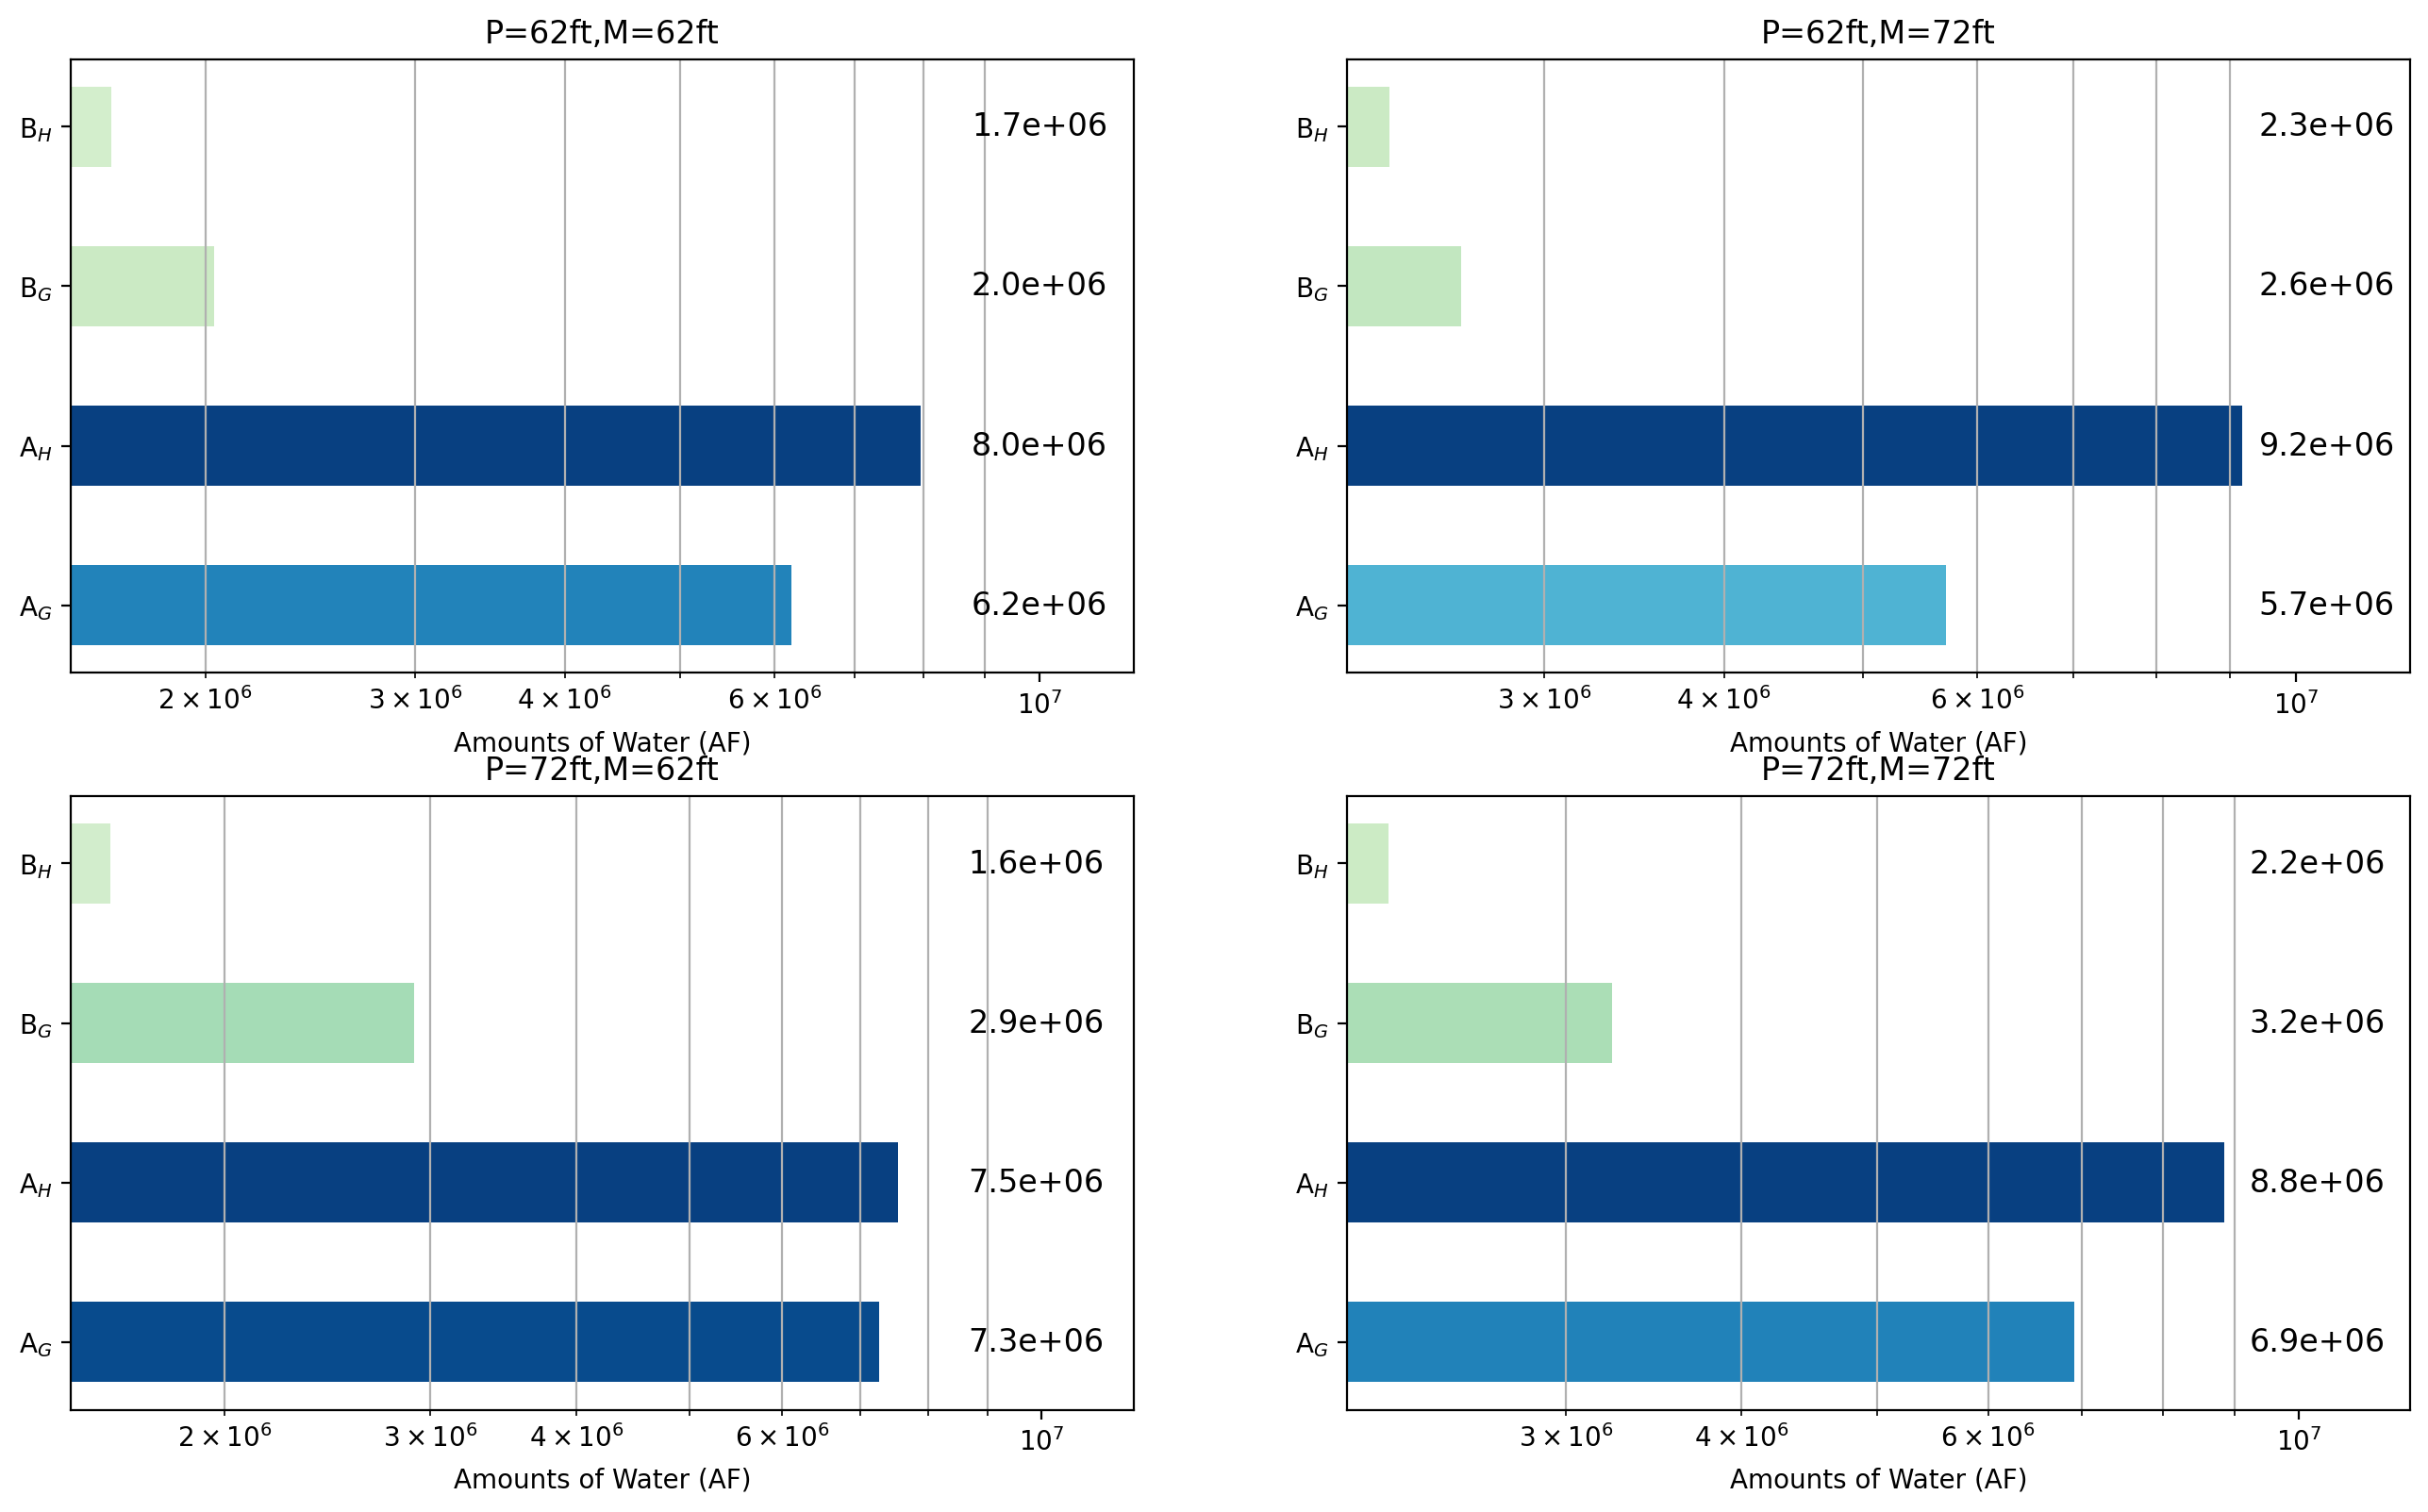

In [58]:
plt.figure(figsize=(16,8), dpi=200)
subplots_adjust(left=0.125,bottom=0.005,top=0.9,right=0.9,hspace=0.2,wspace=0.2)

plt.subplot(221)
y=[1,2,3,4]
x=df['62 62']
str1=['A$_{G}$','A$_{H}$','B$_{G}$','B$_{H}$']
plt.xscale('log')
data_color = df['62 62']
data_color = [x / max(data_color) for x in data_color]
my_cmap = plt.cm.get_cmap('GnBu')
colors = my_cmap(data_color)
rects1 = plt.bar(x=0, bottom=y, color=colors,height=0.5,width=x,orientation="horizontal",tick_label=str1)
plt.xlim(0, 1.2e+07)
plt.grid(which='minor')
plt.title('P=62ft,M=62ft')
plt.xlabel("Amounts of Water (AF)")
plt.text(8.0e+06+2e+06, 1-0.1 , '6.2e+06', ha='center', va='bottom', fontsize=12)
plt.text(8.0e+06+2e+06, 2-0.1 , '8.0e+06', ha='center', va='bottom', fontsize=12)
plt.text(8.0e+06+2e+06, 3-0.1 , '2.0e+06', ha='center', va='bottom', fontsize=12)
plt.text(8.0e+06+2e+06, 4-0.1 , '1.7e+06', ha='center', va='bottom', fontsize=12)


plt.subplot(222)
y=[1,2,3,4]
x=df['62 72']
plt.xscale('log')
data_color = df['62 72']
data_color = [x / max(data_color) for x in data_color]
my_cmap = plt.cm.get_cmap('GnBu')
colors = my_cmap(data_color)
rects1 = plt.bar(x=0, bottom=y, color=colors,height=0.5,width=x,orientation="horizontal",tick_label=str1)
plt.xlim(0, 1.2e+07)
plt.grid(which='minor')
plt.title('P=62ft,M=72ft')
plt.xlabel("Amounts of Water (AF)")
plt.text(9.2e+06+1.3e+06, 1-0.1 , '5.7e+06', ha='center', va='bottom', fontsize=12)
plt.text(9.2e+06+1.3e+06, 2-0.1 , '9.2e+06', ha='center', va='bottom', fontsize=12)
plt.text(9.2e+06+1.3e+06, 3-0.1 , '2.6e+06', ha='center', va='bottom', fontsize=12)
plt.text(9.2e+06+1.3e+06, 4-0.1 , '2.3e+06', ha='center', va='bottom', fontsize=12)

plt.subplot(223)
y=[1,2,3,4]
x=df['72 62']
plt.xscale('log')
data_color = df['72 62']
data_color = [x / max(data_color) for x in data_color]
my_cmap = plt.cm.get_cmap('GnBu')
colors = my_cmap(data_color)
plt.xlabel("Amounts of Water (AF)")
rects1 = plt.bar(x=0, bottom=y, color=colors,height=0.5,width=x,orientation="horizontal",tick_label=str1)
plt.xlim(0, 1.2e+07)
plt.grid(which='minor')
plt.title('P=72ft,M=62ft')
plt.text(7.5e+06+2.4e+06, 1-0.1 , '7.3e+06', ha='center', va='bottom', fontsize=12)
plt.text(7.5e+06+2.4e+06, 2-0.1 , '7.5e+06', ha='center', va='bottom', fontsize=12)
plt.text(7.5e+06+2.4e+06, 3-0.1 , '2.9e+06', ha='center', va='bottom', fontsize=12)
plt.text(7.5e+06+2.4e+06, 4-0.1 , '1.6e+06', ha='center', va='bottom', fontsize=12)


plt.subplot(224)
y=[1,2,3,4]
x=df['72 72']
plt.xscale('log')
data_color = df['72 72']
data_color = [x / max(data_color) for x in data_color]
my_cmap = plt.cm.get_cmap('GnBu')
plt.xlabel("Amounts of Water (AF)")
colors = my_cmap(data_color)
rects1 = plt.bar(x=0, bottom=y, color=colors,height=0.5,width=x,orientation="horizontal",tick_label=str1)
plt.xlim(0, 1.2e+07)
plt.grid(which='minor')
plt.title('P=72ft,M=72ft')
plt.text(8.8e+06+1.5e+06, 1-0.1 , '6.9e+06', ha='center', va='bottom', fontsize=12)
plt.text(8.8e+06+1.5e+06, 2-0.1 , '8.8e+06', ha='center', va='bottom', fontsize=12)
plt.text(8.8e+06+1.5e+06, 3-0.1 , '3.2e+06', ha='center', va='bottom', fontsize=12)
plt.text(8.8e+06+1.5e+06, 4-0.1 , '2.2e+06', ha='center', va='bottom', fontsize=12)
plt.savefig('Q1.png')

In [10]:
P_all=[62,72]
M_all=[62,72]
df=pd.DataFrame()
for i in range(0,len(P_all)):
    for j in range(0,len(M_all)):
        temp=[]
        haha=[]
        P=P_all[i]
        M=M_all[j]
        a=(P-1.7)/132*24322000
        b=(M-0.6)/121*26134000
        class MyProblem(Problem):
            def __init__(self):
                super().__init__(n_var=14,   
                             n_obj=3,   
                             n_constr=9,    
                             xl=np.array([0,0,0,0,0,0,0,0,0,0,0,0,0,0]),     
                             xu=np.array([a,a,a,a,a,a,a,b,b,b,b,b,b,b]),  
                             )
            def _evaluate(self, x, out, *args, **kwargs):

        
        
                alpha=0.6
                belta=0.7
                f1 = -x[:, 0]*1250*2/3/6 - x[:, 1]*1250*1/3/6 - x[:, 2]*1629*2/3/3 -  x[:, 3]*1629*1/3/3-x[:, 4]*1303.4*2/3/2-x[:, 5]*1303.4*1/3/2-x[:, 6]*1250*1/3/6-x[:, 7]*1250*1/3/6-x[:, 8]*1629*1/3/3- x[:, 9]*1629*2/3/3-x[:, 10]*1303.4*1/3/2-x[:, 11]*1303.4*2/3/2-x[:, 12]*(0.3*P+12.5)*36-x[:, 13]*(0.3*M+12.8)*36
                #f2 = -(x[:, 0]+ x[:, 1]+x[:, 6]+x[:, 7])/(4.97*10**7/365)-(x[:, 2]+ x[:, 3]+x[:, 8]+x[:, 9])/(2.65*10**6/365)-(x[:, 4]+ x[:, 5]+x[:, 10]+x[:, 11])/(9.61*10**6/365)
                #f3= -x[:, 12]*(0.3*P+12.5)/(10**6)-x[:, 13]*(0.3*M+12.8)/(10**6)
                f2 = -(x[:, 0]+ x[:, 1]+x[:, 6]+x[:, 7]+x[:, 2]+ x[:, 3]+x[:, 8]+x[:, 9]+x[:, 4]+ x[:, 5]+x[:, 10]+x[:, 11])/(4.97*10**7/365+2.65*10**6/365+9.61*10**6/36)-x[:, 13]/4109
                f3= -x[:, 12]*(0.3*P+12.5)*1.2*10**7-x[:, 13]*(0.3*M+12.8)*1.2*10**7+1.2*10**13
                f4= -2*(x[:, 2]+ x[:, 3]+x[:, 8]+x[:, 9])-6*(x[:, 4]+ x[:, 5]+x[:, 10]+x[:, 11])
        
       
                #g1 = -x[:, 0]-x[:, 1]-x[:, 2]-x[:, 3]-x[:, 4]-x[:, 5]-x[:, 6]-x[:, 7]-x[:, 8]-x[:, 9]-x[:, 10]-x[:, 11]+(4.97*10**7/365+2.65*10**6/365+9.61*10**6/36)*30
                g1=-(x[:, 0]+ x[:, 1]+x[:, 6]+x[:, 7])+(4.97*10**7/365*80)
                g8=-(x[:, 2]+ x[:, 3]+x[:, 8]+x[:, 9])+(2.65*10**6/365*80)
                g9=-(x[:, 4]+ x[:, 5]+x[:, 10]+x[:, 11])+(9.61*10**6/365*80)              
                g2 = -x[:, 12]*1.2*10**7*(0.3*P+12.5)-x[:, 13]*1.2*10**7*(0.3*M+12.8)+1.2*10**13*80
                g3 = x[:, 0]+x[:, 1]+x[:, 2]+x[:, 3]+x[:, 4]+x[:, 5]+x[:, 12]-(P-1.7)*1.8*10**5+0.24*10**7
                g4 = -x[:, 0]-x[:, 1]-x[:, 2]-x[:, 3]-x[:, 4]-x[:, 5]-x[:, 12]+(P-1.7)*1.8*10**5-2.4*10**7
                g5 = x[:, 6]+x[:, 7]+x[:, 8]+x[:, 9]+x[:, 10]+x[:, 11]+x[:, 13]+alpha*x[:, 12]-(M-0.6)*2.2*10**5+0.26*10**7
                g6 = -x[:, 6]-x[:, 7]-x[:, 8]-x[:, 9]-x[:, 10]-x[:, 11]-x[:, 13]-alpha*x[:, 12]+(M-0.6)*2.2*10**5-2.6*10**7
                g7 = -0.6*x[:, 13]+4.1*10**3*80
        # todo
                out["F"] = np.column_stack([ f2,f3,f4])
                out["G"] = np.column_stack([g1, g2, g3, g4, g5, g6,g7,g8,g9])
        
        res = minimize(MyProblem(),
                   algorithm,
                   seed=1,
                   termination=('n_gen', 1000))
        answer=res.X[:1].squeeze().tolist()
        answer=list(res.X[:1].squeeze())
        temp.append("%e"%(answer[0]+answer[1]))
        temp.append("%e"%(answer[2]+answer[3]))
        temp.append("%e"%(answer[4]+answer[5]))
        temp.append("%e"%(answer[6]+answer[7]))
        temp.append("%e"%(answer[8]+answer[9]))
        temp.append("%e"%(answer[10]+answer[11]))
        temp.append("%e"%(answer[12]))
        temp.append("%e"%(answer[13]))

        haha.append(answer[0]+answer[1])
        haha.append(answer[2]+answer[3])
        haha.append(answer[4]+answer[5])
        haha.append(answer[6]+answer[7])
        haha.append(answer[8]+answer[9])
        haha.append(answer[10]+answer[11])
        haha.append(answer[12])
        haha.append(answer[13])
        print(haha)
        print(P,M,temp)

[5341677.694116951, 429415.25046931393, 1004466.0110200801, 5574262.140098739, 227360.61132052186, 1879303.5744702506, 1622432.005070215, 1988585.1966521933]
62 62 ['5.341678e+06', '4.294153e+05', '1.004466e+06', '5.574262e+06', '2.273606e+05', '1.879304e+06', '1.622432e+06', '1.988585e+06']
[4845078.129578512, 460255.0353590037, 2836232.420180455, 6109704.795684148, 204067.99988839903, 4442056.877755085, 310651.28225508623, 2127836.5097359037]
62 72 ['4.845078e+06', '4.602550e+05', '2.836232e+06', '6.109705e+06', '2.040680e+05', '4.442057e+06', '3.106513e+05', '2.127837e+06']
[4388939.606073172, 582311.5461840054, 2666807.5622871406, 6816022.1129961405, 152893.88747423384, 337675.86738213606, 2589660.995033694, 2026963.3698251657]
72 62 ['4.388940e+06', '5.823115e+05', '2.666808e+06', '6.816022e+06', '1.528939e+05', '3.376759e+05', '2.589661e+06', '2.026963e+06']
[4189917.7516722567, 1016769.2310872155, 4751526.99196052, 6741401.599539913, 490338.0872547897, 3380601.4205770404, 130976

In [11]:
df['62 62']=['5.341678e+06', '4.294153e+05', '1.004466e+06', '5.574262e+06', '2.273606e+05', '1.879304e+06', '1.622432e+06', '1.988585e+06']
df['62 72']=['4.845078e+06', '4.602550e+05', '2.836232e+06', '6.109705e+06', '2.040680e+05', '4.442057e+06', '3.106513e+05', '2.127837e+06']
df['72 62']=['4.388940e+06', '5.823115e+05', '2.666808e+06', '6.816022e+06', '1.528939e+05', '3.376759e+05', '2.589661e+06', '2.026963e+06']
df['72 72']=['4.189918e+06', '1.016769e+06', '4.751527e+06', '6.741402e+06', '4.903381e+05', '3.380601e+06', '1.309763e+05', '2.407268e+06']
#str1=['A$_{G,agriculture,upstream}$','A$_{G,agriculture,downstream}$', 'A$_{G,industrial,upstream}$','A$_{G,industrial,downstream}$','A$_{G,residential,upstream}$', 'A$_{G,residential,downstream}$','A$_{H,agriculture,upstream}$','A$_{H,agriculture,downstream}$', 'A$_{H,industrial,upstream}$','A$_{H,industrial,downstream}$','A$_{H,residential,upstream}$', 'A$_{H,residential,downstream}$',  'B$_{G}$', 'B$_{H}$']
#df.index=str1
df

,62 62,62 72,72 62,72 72
0,5.341678e+06,4.845078e+06,4.388940e+06,4.189918e+06
1,4.294153e+05,4.602550e+05,5.823115e+05,1.016769e+06
2,1.004466e+06,2.836232e+06,2.666808e+06,4.751527e+06
3,5.574262e+06,6.109705e+06,6.816022e+06,6.741402e+06
4,2.273606e+05,2.040680e+05,1.528939e+05,4.903381e+05
5,1.879304e+06,4.442057e+06,3.376759e+05,3.380601e+06
6,1.622432e+06,3.106513e+05,2.589661e+06,1.309763e+05
7,1.988585e+06,2.127837e+06,2.026963e+06,2.407268e+06


In [12]:
for i in range (0,8):
    for m in range (0,4):
        if int(df.iloc[i,m][3])>=5:
            temp=int(df.iloc[i,m][2])+1
            temp=str(temp)
        else:
            temp=df.iloc[i,m][2]
        df.iloc[i,m]=df.iloc[i,m][0]+'.'+temp+df.iloc[i,m][-4:]

In [13]:
df

,62 62,62 72,72 62,72 72
0,5.3e+06,4.8e+06,4.4e+06,4.2e+06
1,4.3e+05,4.6e+05,5.8e+05,1.0e+06
2,1.0e+06,2.8e+06,2.7e+06,4.8e+06
3,5.6e+06,6.1e+06,6.8e+06,6.7e+06
4,2.3e+05,2.0e+05,1.5e+05,4.9e+05
5,1.9e+06,4.4e+06,3.4e+05,3.4e+06
6,1.6e+06,3.1e+05,2.6e+06,1.3e+05
7,1.10e+06,2.1e+06,2.0e+06,2.4e+06


In [15]:
df1=pd.DataFrame()
df1['62 62']=[5341677.694116951, 429415.25046931393, 1004466.0110200801, 5574262.140098739, 227360.61132052186, 1879303.5744702506, 1622432.005070215, 1988585.1966521933]
df1['62 72']=[4845078.129578512, 460255.0353590037, 2836232.420180455, 6109704.795684148, 204067.99988839903, 4442056.877755085, 310651.28225508623, 2127836.5097359037]
df1['72 62']=[4388939.606073172, 582311.5461840054, 2666807.5622871406, 6816022.1129961405, 152893.88747423384, 337675.86738213606, 2589660.995033694, 2026963.3698251657]
df1['72 72']=[4189917.7516722567, 1016769.2310872155, 4751526.99196052, 6741401.599539913, 490338.0872547897, 3380601.4205770404, 130976.2745196789, 2407268.101465745]
df1

,62 62,62 72,72 62,72 72
0,5.341678e+06,4.845078e+06,4.388940e+06,4.189918e+06
1,4.294153e+05,4.602550e+05,5.823115e+05,1.016769e+06
2,1.004466e+06,2.836232e+06,2.666808e+06,4.751527e+06
3,5.574262e+06,6.109705e+06,6.816022e+06,6.741402e+06
4,2.273606e+05,2.040680e+05,1.528939e+05,4.903381e+05
5,1.879304e+06,4.442057e+06,3.376759e+05,3.380601e+06
6,1.622432e+06,3.106513e+05,2.589661e+06,1.309763e+05
7,1.988585e+06,2.127837e+06,2.026963e+06,2.407268e+06


In [16]:
df

,62 62,62 72,72 62,72 72
0,5.3e+06,4.8e+06,4.4e+06,4.2e+06
1,4.3e+05,4.6e+05,5.8e+05,1.0e+06
2,1.0e+06,2.8e+06,2.7e+06,4.8e+06
3,5.6e+06,6.1e+06,6.8e+06,6.7e+06
4,2.3e+05,2.0e+05,1.5e+05,4.9e+05
5,1.9e+06,4.4e+06,3.4e+05,3.4e+06
6,1.6e+06,3.1e+05,2.6e+06,1.3e+05
7,1.10e+06,2.1e+06,2.0e+06,2.4e+06


C:\Users\hwq\AppData\Local\Temp/ipykernel_12072/1043714356.py:13: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  plt.xlim(0, 1.2e+07)
C:\Users\hwq\AppData\Local\Temp/ipykernel_12072/1043714356.py:38: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  plt.xlim(0, 1.2e+07)
C:\Users\hwq\AppData\Local\Temp/ipykernel_12072/1043714356.py:62: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  plt.xlim(0, 1.2e+07)
C:\Users\hwq\AppData\Local\Temp/ipykernel_12072/1043714356.py:87: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  plt.xlim(0, 1.2e+07)


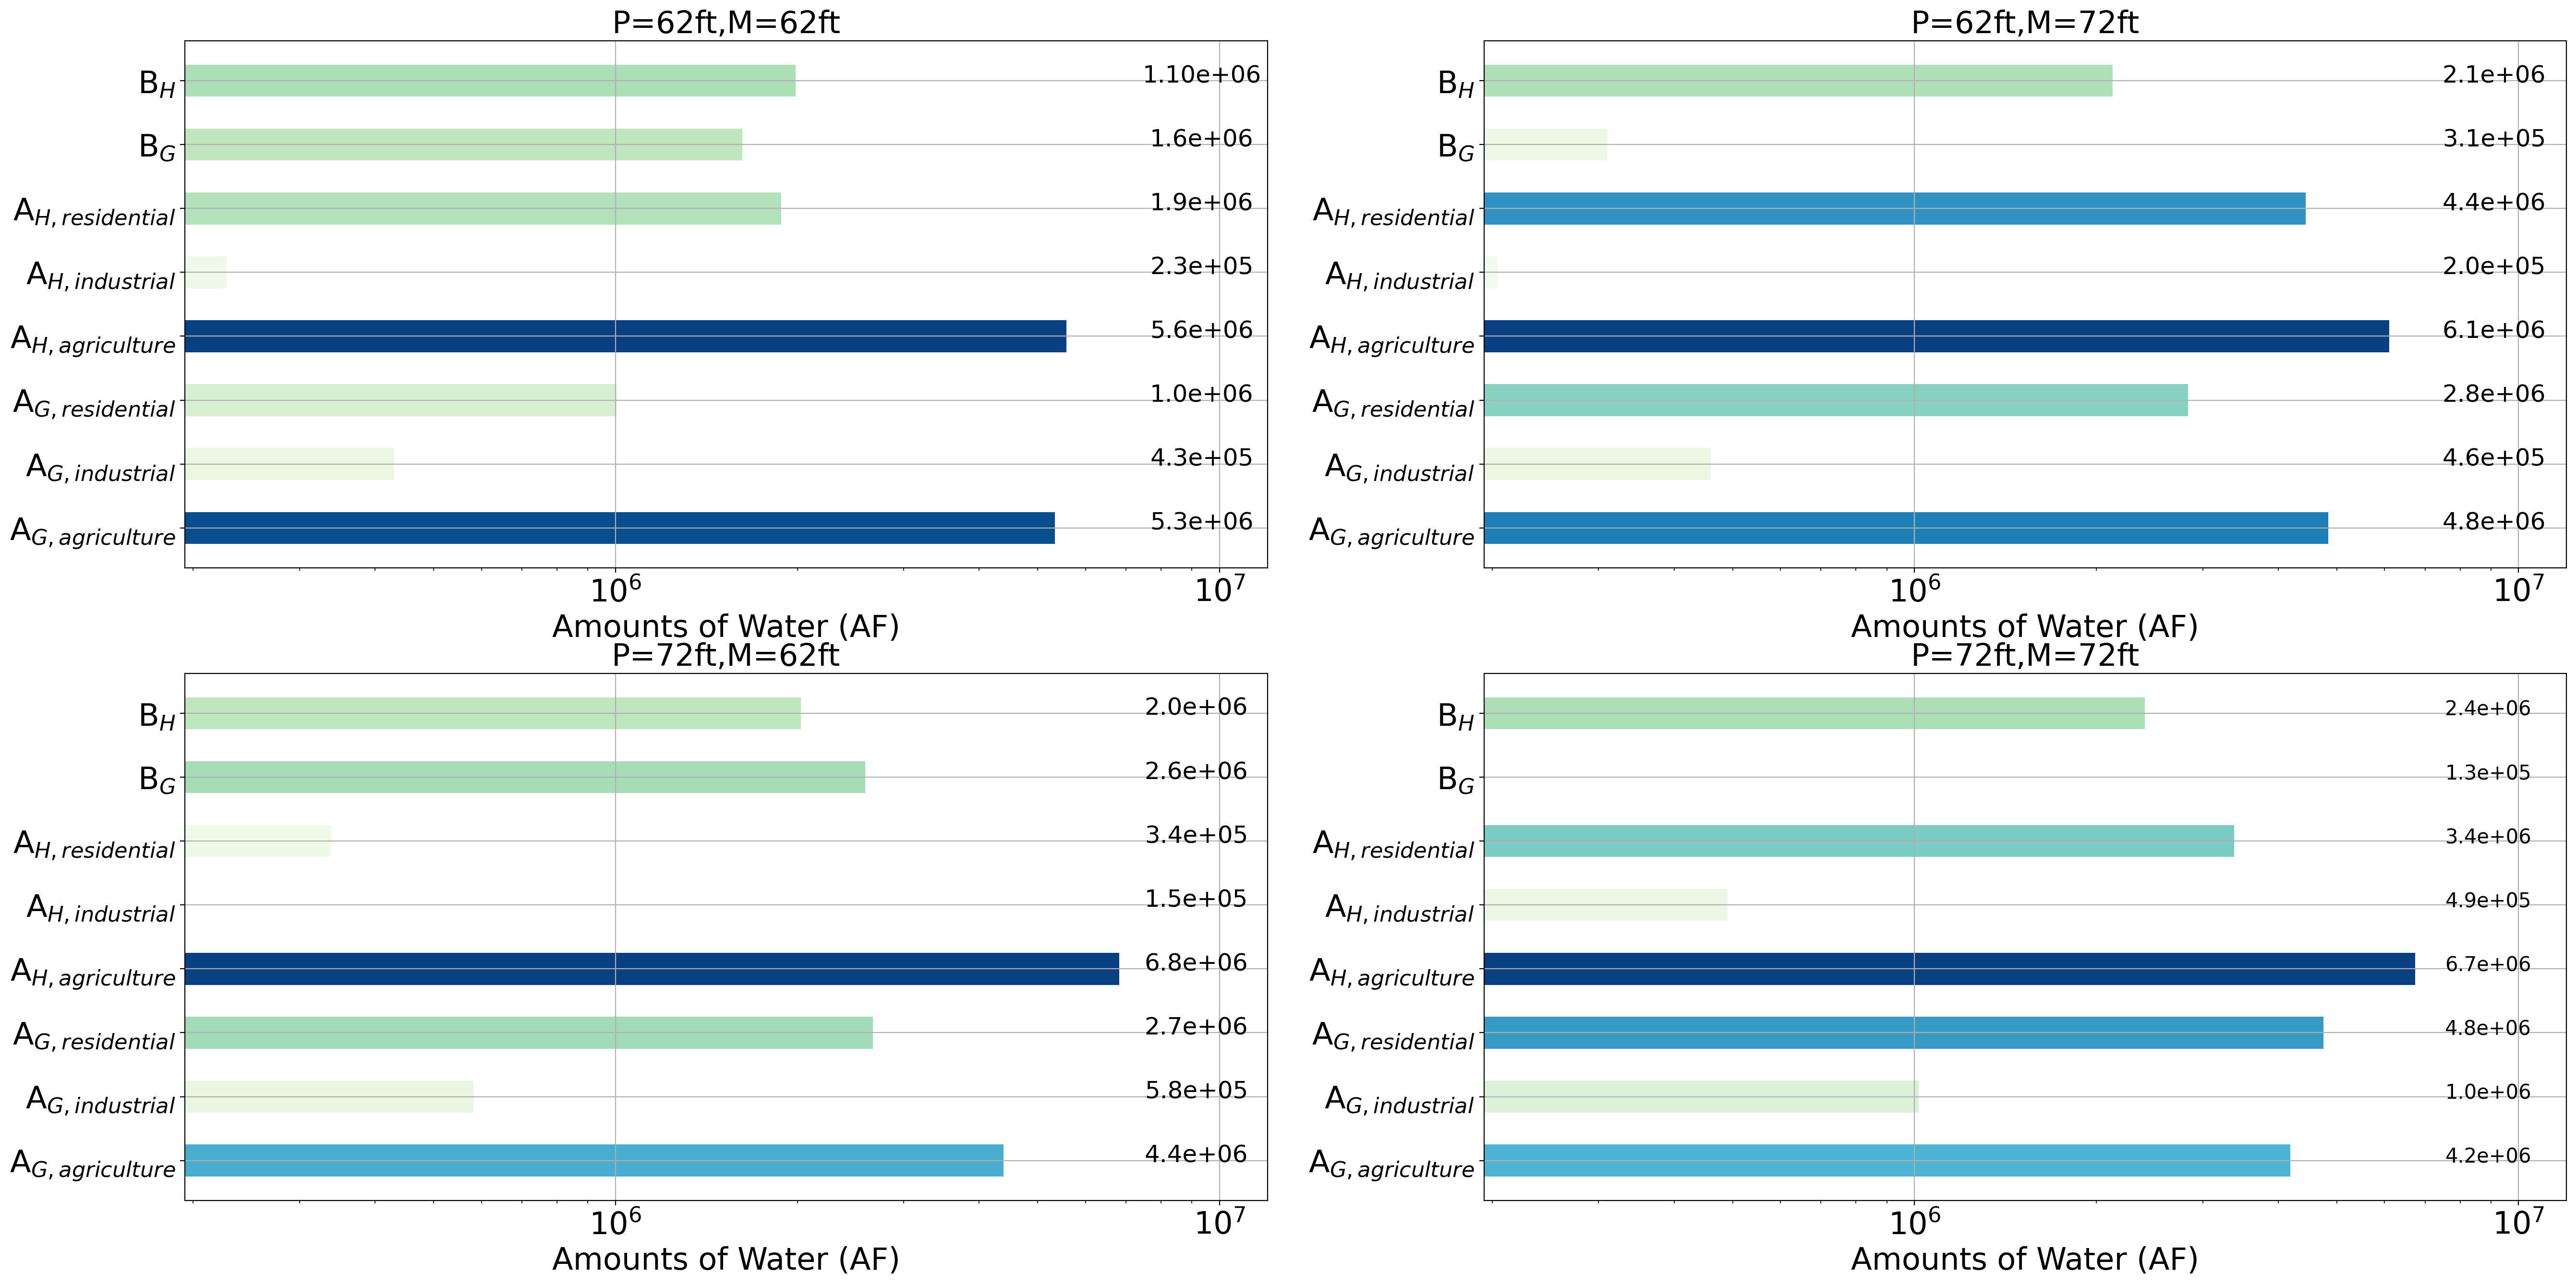

In [36]:
plt.figure(figsize=(32,16), dpi=200)
str1=['A$_{G,agriculture}$', 'A$_{G,industrial}$','A$_{G,residential}$','A$_{H,agriculture}$', 'A$_{H,industrial}$','A$_{H,residential}$', 'B$_{G}$', 'B$_{H}$']

ax1 =plt.subplot(221)
y=[1,2,3,4,5,6,7,8,]
x=df1['62 62']
plt.xscale('log')
data_color = df1['62 62']
data_color = [x / max(data_color) for x in data_color]
my_cmap = plt.cm.get_cmap('GnBu')
colors = my_cmap(data_color)
rects1 = plt.bar(x=0, bottom=y, color=colors,height=0.5,width=x,orientation="horizontal",tick_label=str1)
plt.xlim(0, 1.2e+07)
plt.grid()
plt.title('P=62ft,M=62ft',fontsize=23)
plt.xticks(fontsize=23)
plt.yticks(fontsize=23)
plt.xlabel("Amounts of Water (AF)",fontsize=23)
plt.text(df1.iloc[0,0]+4e+06, 1-0.1 , df.iloc[0,0], ha='center', va='bottom', fontsize=18)
plt.text(df1.iloc[0,0]+4e+06, 2-0.1 , df.iloc[1,0], ha='center', va='bottom', fontsize=18)
plt.text(df1.iloc[0,0]+4e+06, 3-0.1 , df.iloc[2,0], ha='center', va='bottom', fontsize=18)
plt.text(df1.iloc[0,0]+4e+06, 4-0.1 , df.iloc[3,0], ha='center', va='bottom', fontsize=18)
plt.text(df1.iloc[0,0]+4e+06, 5-0.1 , df.iloc[4,0], ha='center', va='bottom', fontsize=18)
plt.text(df1.iloc[0,0]+4e+06, 6-0.1 , df.iloc[5,0], ha='center', va='bottom', fontsize=18)
plt.text(df1.iloc[0,0]+4e+06, 7-0.1 , df.iloc[6,0], ha='center', va='bottom', fontsize=18)
plt.text(df1.iloc[0,0]+4e+06, 8-0.1 , df.iloc[7,0], ha='center', va='bottom', fontsize=18)



ax2 =plt.subplot(222,sharex=ax1)
x=df1['62 72']
plt.xscale('log')
data_color = df1['62 72']
data_color = [x / max(data_color) for x in data_color]
my_cmap = plt.cm.get_cmap('GnBu')
colors = my_cmap(data_color)
rects1 = plt.bar(x=0, bottom=y, color=colors,height=0.5,width=x,orientation="horizontal",tick_label=str1)
plt.xlim(0, 1.2e+07)
plt.xticks(fontsize=23)
plt.yticks(fontsize=23)
plt.grid()
plt.title('P=62ft,M=72ft',fontsize=23)
plt.xlabel("Amounts of Water (AF)",fontsize=23)
plt.text(df1.iloc[3,1]+3e+06, 1-0.1 , df.iloc[0,1], ha='center', va='bottom', fontsize=18)
plt.text(df1.iloc[3,1]+3e+06, 2-0.1 , df.iloc[1,1], ha='center', va='bottom', fontsize=18)
plt.text(df1.iloc[3,1]+3e+06, 3-0.1 , df.iloc[2,1], ha='center', va='bottom', fontsize=18)
plt.text(df1.iloc[3,1]+3e+06, 4-0.1 , df.iloc[3,1], ha='center', va='bottom', fontsize=18)
plt.text(df1.iloc[3,1]+3e+06, 5-0.1 , df.iloc[4,1], ha='center', va='bottom', fontsize=18)
plt.text(df1.iloc[3,1]+3e+06, 6-0.1 , df.iloc[5,1], ha='center', va='bottom', fontsize=18)
plt.text(df1.iloc[3,1]+3e+06, 7-0.1 , df.iloc[6,1], ha='center', va='bottom', fontsize=18)
plt.text(df1.iloc[3,1]+3e+06, 8-0.1 , df.iloc[7,1], ha='center', va='bottom', fontsize=18)


ax3 =plt.subplot(223,sharex=ax1)
x=df1['72 62']
plt.xscale('log')
data_color = df1['72 62']
data_color = [x / max(data_color) for x in data_color]
my_cmap = plt.cm.get_cmap('GnBu')
colors = my_cmap(data_color)
rects1 = plt.bar(x=0, bottom=y, color=colors,height=0.5,width=x,orientation="horizontal",tick_label=str1)
plt.xlim(0, 1.2e+07)
plt.grid()
plt.title('P=72ft,M=62ft',fontsize=23)
plt.xlabel("Amounts of Water (AF)",fontsize=23)
plt.text(df1.iloc[4,2]+0.9e+07, 1-0.1 , df.iloc[0,2], ha='center', va='bottom', fontsize=18)
plt.text(df1.iloc[4,2]+0.9e+07, 2-0.1 , df.iloc[1,2], ha='center', va='bottom', fontsize=18)
plt.text(df1.iloc[4,2]+0.9e+07, 3-0.1 , df.iloc[2,2], ha='center', va='bottom', fontsize=18)
plt.text(df1.iloc[4,2]+0.9e+07, 4-0.1 , df.iloc[3,2], ha='center', va='bottom', fontsize=18)
plt.text(df1.iloc[4,2]+0.9e+07, 5-0.1 , df.iloc[4,2], ha='center', va='bottom', fontsize=18)
plt.text(df1.iloc[4,2]+0.9e+07, 6-0.1 , df.iloc[5,2], ha='center', va='bottom', fontsize=18)
plt.text(df1.iloc[4,2]+0.9e+07, 7-0.1 , df.iloc[6,2], ha='center', va='bottom', fontsize=18)
plt.text(df1.iloc[4,2]+0.9e+07, 8-0.1 , df.iloc[7,2], ha='center', va='bottom', fontsize=18)
plt.xticks(fontsize=23)
plt.yticks(fontsize=23)



ax4 =plt.subplot(224,sharex=ax1)
x=df1['72 72']
plt.xscale('log')
data_color = df1['72 72']
data_color = [x / max(data_color) for x in data_color]
my_cmap = plt.cm.get_cmap('GnBu')
colors = my_cmap(data_color)
rects1 = plt.bar(x=0, bottom=y, color=colors,height=0.5,width=x,orientation="horizontal",tick_label=str1)
plt.xlim(0, 1.2e+07)
plt.grid()
plt.title('P=72ft,M=72ft',fontsize=23)
plt.xlabel("Amounts of Water (AF)",fontsize=23)
plt.xticks(fontsize=23)
plt.yticks(fontsize=23)
plt.text(df1.iloc[7,3]+6.5e+06, 1-0.1 , df.iloc[0,3], ha='center', va='bottom', fontsize=15)
plt.text(df1.iloc[7,3]+6.5e+06, 2-0.1 , df.iloc[1,3], ha='center', va='bottom', fontsize=15)
plt.text(df1.iloc[7,3]+6.5e+06, 3-0.1 , df.iloc[2,3], ha='center', va='bottom', fontsize=15)
plt.text(df1.iloc[7,3]+6.5e+06, 4-0.1 , df.iloc[3,3], ha='center', va='bottom', fontsize=15)
plt.text(df1.iloc[7,3]+6.5e+06, 5-0.1 , df.iloc[4,3], ha='center', va='bottom', fontsize=15)
plt.text(df1.iloc[7,3]+6.5e+06, 6-0.1 , df.iloc[5,3], ha='center', va='bottom', fontsize=15)
plt.text(df1.iloc[7,3]+6.5e+06, 7-0.1 , df.iloc[6,3], ha='center', va='bottom', fontsize=15)
plt.text(df1.iloc[7,3]+6.5e+06, 8-0.1 , df.iloc[7,3], ha='center', va='bottom', fontsize=15)

plt.savefig('Q2.png')